## Importing required Libraries and Insurance Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

#Setting default seaborn style for the plots
sns.set()

In [3]:
insurance= pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Analysis:
* Age column: Data looks representative of the true age distribution of the adult population with (39) mean.
* Children Column: Few people have more than 2 children (75% of the people have 2 or less children).
* The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.

## Check for Missing values and Outliers

In [5]:
#Checking for null values
insurance.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


Output shows no missing data present in the dataset

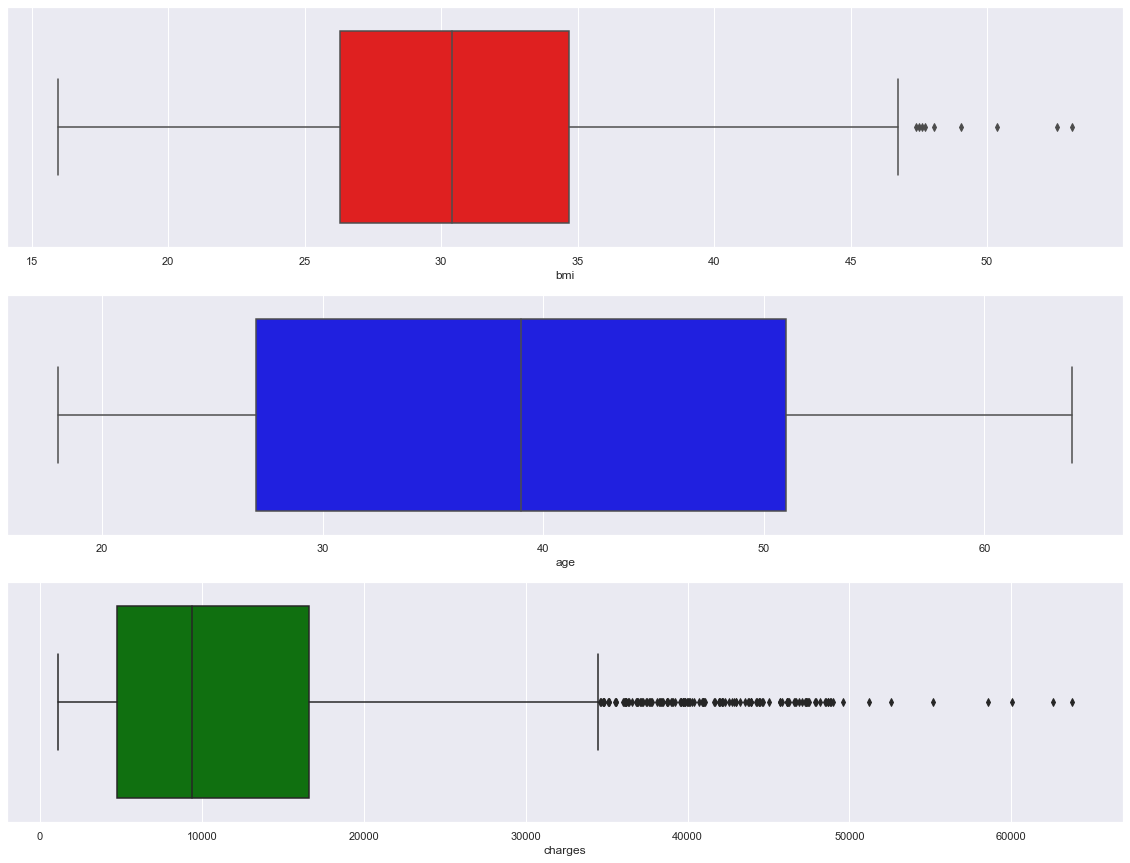

In [11]:
#Checking for Outliers
plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
sns.boxplot(x=insurance.bmi, color='red')

plt.subplot(3, 1, 2)
sns.boxplot(x=insurance.age, color='blue')

plt.subplot(3, 1, 3)
sns.boxplot(x=insurance.charges, color='green')

Analysis:
* BMI has a few extreme values
* Charges are highly skewed as there are quiet a lot of extreme values

## Visual methods to analyse the data

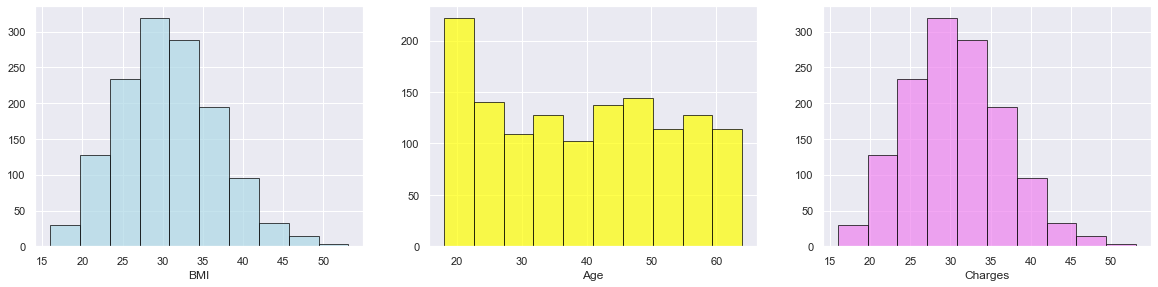

In [18]:
#Plots for distribution of continuous features
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(insurance.bmi, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('BMI')

plt.subplot(3,3,2)
plt.hist(insurance.age, color='yellow', edgecolor='black', alpha=0.7)
plt.xlabel('Age')

plt.subplot(3,3,3)
plt.hist(insurance.bmi, color='violet', edgecolor='black', alpha=0.7)
plt.xlabel('Charges')

plt.show()

Analysis:
* BMI looks normally distributed.
* Age looks uniformly distributed.
* Charges are highly skewed.

In [20]:
#Showing the skewness of the variables

Skewness= pd.DataFrame({'Skewness': [stats.skew(insurance.bmi), stats.skew(insurance.age), stats.skew(insurance.charges)]},
                     index=['BMI', 'Age', 'Charges'])
Skewness

,Skewness
BMI,0.283729
Age,0.055610
Charges,1.514180


Analysis:
* Skewness of BMI is very low
* Age is unifformly distributed, and thus not skewed
* Charges are highly skewed

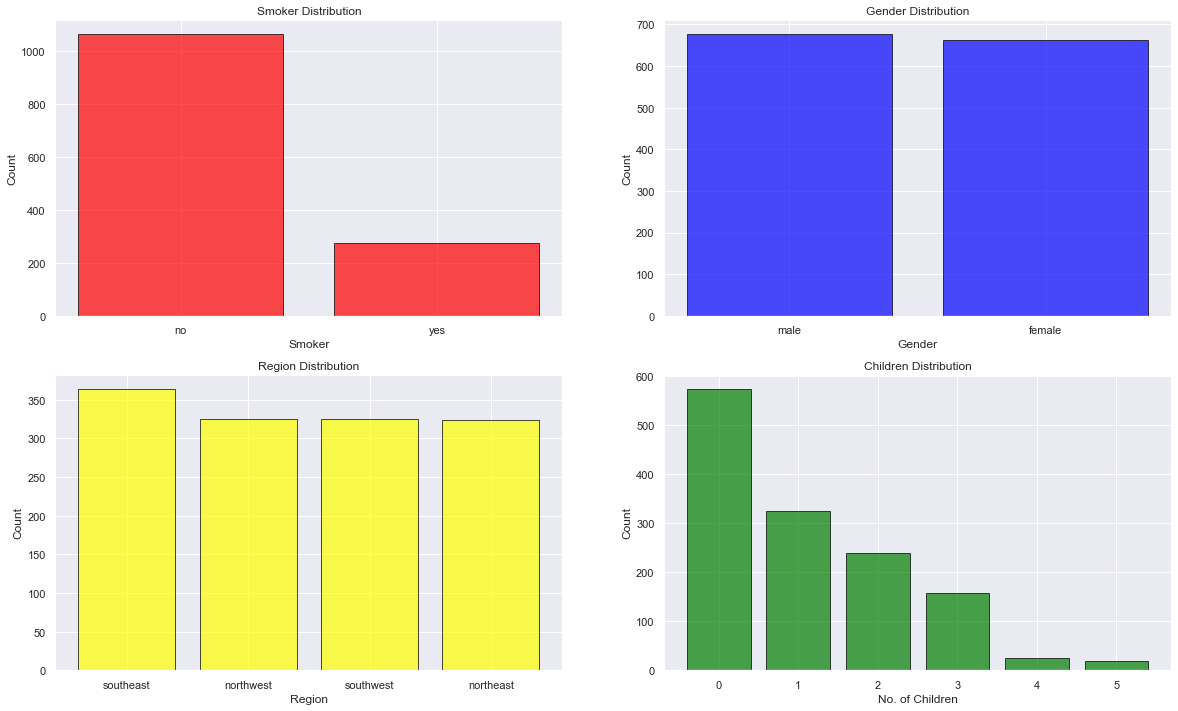

In [28]:
#Visualizing Data to make analysis
plt.figure(figsize=(20, 25))

#SMOKER DISTRIBUTION
#Values of x-axis
x= insurance.smoker.value_counts().index
#Counts of each class on y-axis
y= [insurance['smoker'].value_counts()[i] for i in x]

plt.subplot(4, 2, 1)
plt.bar(x, y, align='center', color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Distribution')

#GENDER DISTRIBUTION
x1= insurance.sex.value_counts().index
y1= [insurance['sex'].value_counts()[j] for j in x1]

plt.subplot(4, 2, 2)
plt.bar(x1, y1, align='center', color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

#REGION DISTRIBUTION
x2= insurance.region.value_counts().index
y2= [insurance['region'].value_counts()[k] for k in x2]

plt.subplot(4, 2, 3)
plt.bar(x2, y2, align='center', color='yellow', edgecolor='black', alpha=0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')

#CHILDREN DISTRIBUTION
x3= insurance.children.value_counts().index
y3= [insurance['children'].value_counts()[l] for l in x3]

plt.subplot(4, 2, 4)
plt.bar(x3, y3, align='center', color='green', edgecolor='black', alpha=0.7)
plt.xlabel('No. of Children')
plt.ylabel('Count')
plt.title('Children Distribution')

plt.show()

Analysis: 
* More smokers than non-smokers
* Instances are distributed evenly across all regions
* Gender is also distributed evenly
* Most instances have less than 3 children and very few have 4 or 5 children

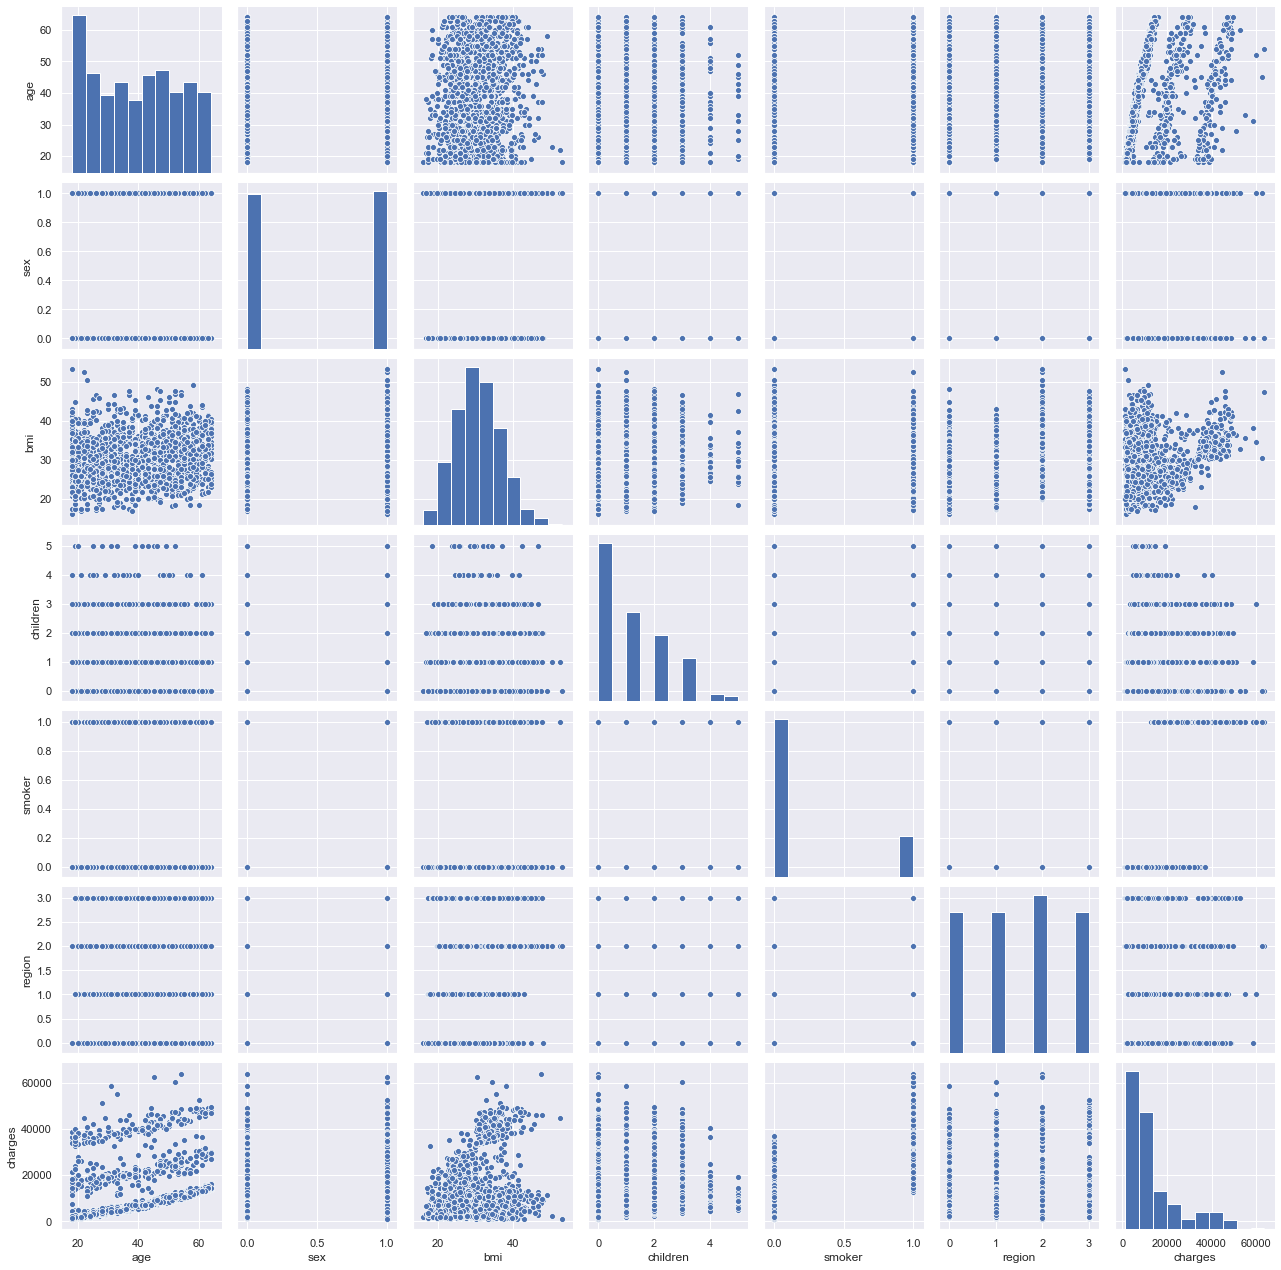

In [32]:
# Label encoding the variables before doing a pairplot as pairplot ignores strings

insurance_encoded = copy.deepcopy(insurance)
insurance_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

#Pairplot
sns.pairplot(insurance_encoded)
plt.show()

Analysis:
* There is an obvious correlation between 'charges' and 'smoker'
* Looks like smokers claimed more money than non-smokers
* There's an interesting pattern between 'age' and 'charges'. Notice that older people are charged more than the younger ones

## Analysing trends, patterns and relationships in the data.

### Relation between Smokers and Charges

In [34]:
# Do charges of people who smoke differ significantly from the people who don't?
print("Do charges of people who smoke differ significantly from the people who don't?")
insurance.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

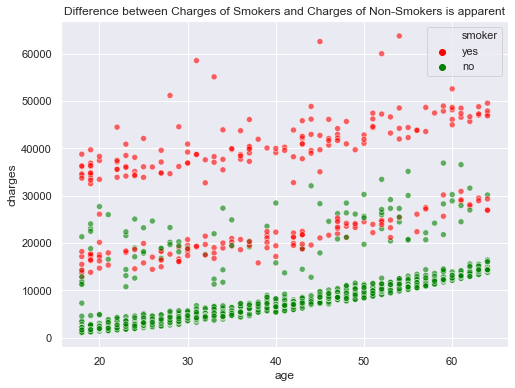

In [39]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(insurance.age,  insurance.charges, hue=insurance.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Difference between Charges of Smokers and Charges of Non-Smokers is apparent")
plt.show()

### Relation between Age and Charges

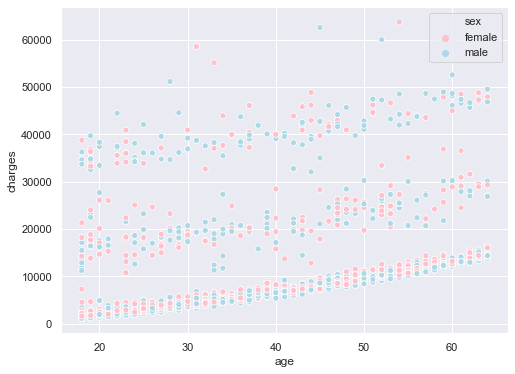

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance.age, insurance.charges, hue= insurance.sex,palette= ['pink','lightblue'] )

Analysis: There is no apparent relation between gender and charges

### Relation between Smokers and Charges

In [40]:
# T-test to check dependency of smoking on charges

# Stating the Null Hypothesis
Ho = "Charges of smoker and non-smoker are same"   
# Stating the Alternate Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   

x = np.array(insurance[insurance.smoker=='yes'].charges)
y = np.array(insurance[insurance.smoker=='no'].charges)

# Performing an Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

# Setting our significance level at 5%
if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


Analysis: Smokers seem to clain significantly more money than non-smokers

### BMI Comparison between Males and Females

In [43]:
print ("Does bmi of males differ significantly from that of females?")
insurance.sex.value_counts()   #Checking the distribution of males and females

Does bmi of males differ significantly from that of females?


male      676
female    662
Name: sex, dtype: int64

In [44]:
# T-test to check dependency of bmi on gender

#Null Hypothesis
Ho = "Gender has no effect on bmi"   
#Alternate Hypothesis
Ha = "Gender has an effect on bmi"   

x = np.array(insurance[insurance.sex=='male'].bmi)
y = np.array(insurance[insurance.sex=='female'].bmi)

#Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

#Setting significance value at 5%
if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


Analysis: BMI of both genders are the same

### Relation between Smokers and Gender

In [45]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(insurance['sex'], insurance['smoker'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Analysis: Proportion of Smokers in Males is higher than in Females

### Relation between Smokers and Region

In [46]:
Ho = "Region has no effect on smoking habits"   
Ha = "Region has an effect on smoking habits"  

crosstab =  pd.crosstab(insurance['region'], insurance['smoker'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


Analysis: Smoking habits of people in different regions are similar

### Relation between BMI and No. of Children

In [50]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis

female_df = copy.deepcopy(insurance[insurance['sex']=='female'])

zero = female_df[female_df['children']==0]['bmi']
one = female_df[female_df['children']==1]['bmi']
two = female_df[female_df['children']==2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
